In [226]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math

In [227]:
v0 = 1000 # начальная скорость ракеты противника (м/с)
g = 9.80665 # ускорение свободного падения (м/с2)
a = math.pi/4 # угол запуска (рад)
alfa = 0.02 # параметр, характеризующий ошибку измерений
start = 15
end = 41

In [228]:
# Реальная траектория
T2 = 2*v0*np.sin(a)/g # время полёта ракеты
T = np.arange(0, T2 + T2/100, T2/100)
x = v0*T*np.cos(a) # координаты по оси х
y = v0*T*np.sin(a)-(g*T**2)/2 # координаты по оси у

In [229]:
# Телеметрия траектории
xe = []
for i in range(end - start):
    xe.append(x[i+start-1])
ye = []
for i in range(len(xe)):
    ye.append(y[i+start-1]*(1+alfa*np.random.randn()))

# Матрица
A = [i**2 for i in xe]
A = np.c_[A]
A = np.hstack((A, np.c_[xe]))
A = np.hstack((A, np.ones((end - start,1))))
# Матрица нормальной системы уравнений
AA = A.transpose().dot(A)
# Число обусловленности 
print('Число обусловленности  =', LA.cond(AA))
# Вектор искомых коэффициентов
koef = LA.inv(AA).dot(A.transpose())
koef = koef.dot(np.c_[ye])
# "Искомые" координаты траектории
yet = A.dot(koef)

# Вся траектория
yey = [i**2 for i in x]
yey = np.c_[yey]
yey = np.hstack((yey, np.c_[x]))
yey = np.hstack((yey, np.ones((len(x),1))))
yey = yey.dot(koef)

Число обусловленности  = 1.4248443444165983e+20


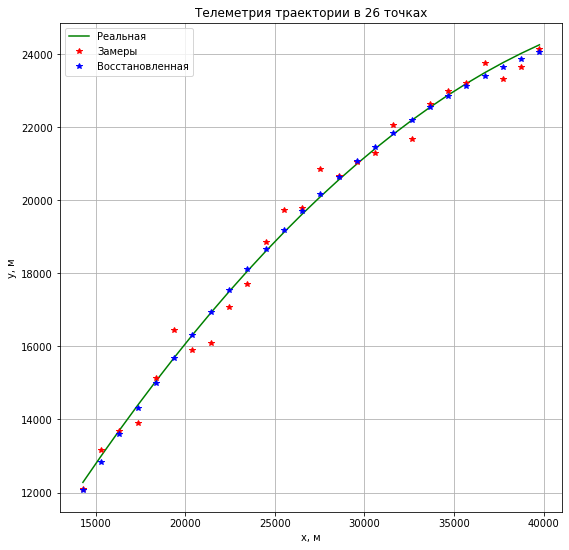

In [230]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
plt.title("Телеметрия траектории в 26 точках") # заголовок
plt.xlabel("x, м") # ось абсцисс
plt.ylabel("y, м") # ось ординат
plt.grid() # включение отображение сетки
z = ax.plot(x[14:40], y[14:40], 'g', label = "Реальная")
z = ax.plot(xe, ye, '*r', LineWidth = 2, label = "Замеры")
z = ax.plot(xe, yet, '*b', label = "Восстановленная")
z = ax.legend()

In [231]:
error26 = max(abs(ye - y[start:end]))
print('Макс отклонение =', error26)

Макс отклонение = 1391.7909389989072


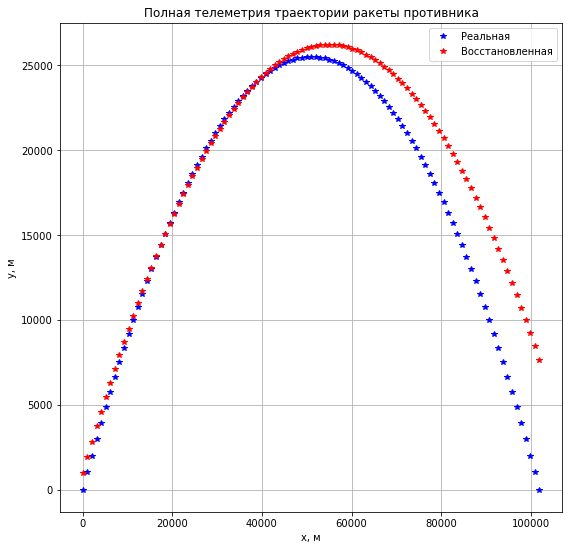

In [225]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
plt.title("Полная телеметрия траектории ракеты противника") # заголовок
plt.xlabel("x, м") # ось абсцисс
plt.ylabel("y, м") # ось ординат
plt.grid() # включение отображение сетки
z = ax.plot(x, y, '*b', LineWidth = 2, label = "Реальная")
z = ax.plot(x, yey, '*r', label = "Восстановленная")
z = ax.legend()